## Appendix: Generating a wordcloud from frequencies

In [12]:
import nltk
persuasion_raw = nltk.corpus.gutenberg.words('austen-persuasion.txt')
moby_raw = nltk.corpus.gutenberg.words('melville-moby_dick.txt')

In [14]:
persuasion_raw[:5]

['[', 'Persuasion', 'by', 'Jane', 'Austen']

In [23]:
print(len(persuasion_raw))
print(len(moby_raw))

98171
260819


In [28]:
def chunk(doc, chunk_size=5000):
    """breaks up document into sections with chunk_size number of elements"""
    return [doc[i:i+chunk_size] for i in range(0, len(doc), chunk_size)]

persuasion_chunks = chunk(persuasion_raw)
moby_chunks = chunk(moby_raw)

In [29]:
print(len(persuasion_chunks))
print(len(moby_chunks))

20
53


In [51]:
import pandas as pd
all_docs = pd.DataFrame({'words': persuasion_chunks + moby_chunks})
all_docs.head()

,words
0,"([, Persuasion, by, Jane, Austen, 1818, ], Cha..."
1,"(with, the, daughter, of, Mr, Shepherd, ,, who..."
2,"(ever, with, her, own, discretion, ,, never, w..."
3,"(,, without, much, waiting, for, an, answer, ;..."
4,"(father, ,, through, the, gloom, of, the, even..."


In [54]:
all_docs["chunks"] = all_docs['words'].str.join(" ")

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

tf_vectorizer = CountVectorizer(stop_words='english')
tf = tf_vectorizer.fit_transform(all_docs['chunks'])

`CountVectorizer` computes the frequency of each word in each document. In the Brown corpus, each sentence is fairly short and so it is fairly common for all the words to appear only once. For a word cloud, we want to find a sentence with a variety of frequencies. We convert `tf` to an array because tf is natively a sparse matix, which is not navigable in the same way as other data structures. We then search for documents (rows) which have words with more than 10 occurances, with a statement that returns `True` when any column (axis=1) has a value greater than 10. `get_feature_names` yields the words being counted, listed in the same order as the counts in the array.

In [76]:
import numpy as np
tf_mat = tf.toarray()
docs = tf_mat[(tf_mat>10).any(axis=1)]
words = np.array(tf_vectorizer.get_feature_names())

`CountVectorizer` assigns every word in the corpus to a column in the array. We want to only look at the words that occur in the document, so we ask for all values in the array `doc` that are greater than 0. `doc` is arbitrarily chosen from our set of highly variable documents

In [77]:
doc = docs[1] 
idx = (doc>0)
doc_words = words[idx]
doc_counts = doc[doc>0]

We uze the `zip` method to couple the words to their counts, and then convert the collection of pairs to a dictionary using the `dict` function.

In [83]:
frequencies = dict(zip(doc_words, doc_counts))
frequencies

{'1806': 1,
 'abroad': 2,
 'acceptable': 1,
 'accepted': 1,
 'accidentally': 2,
 'account': 1,
 'acquaintance': 1,
 'acquainted': 3,
 'acquired': 1,
 'act': 1,
 'acted': 1,
 'action': 2,
 'actions': 1,
 'active': 1,
 'actually': 1,
 'add': 1,
 'added': 3,
 'additional': 3,
 'admiral': 19,
 'advantage': 3,
 'advertised': 1,
 'advice': 1,
 'advising': 1,
 'affection': 1,
 'affluence': 1,
 'afraid': 1,
 'age': 3,
 'aggravation': 1,
 'agree': 1,
 'aid': 1,
 'air': 1,
 'alliance': 2,
 'allow': 1,
 'allowing': 1,
 'amazement': 1,
 'amicable': 1,
 'anne': 14,
 'annexed': 1,
 'answered': 1,
 'anxiety': 1,
 'anxious': 1,
 'anybody': 1,
 'appeal': 1,
 'appear': 1,
 'appearance': 2,
 'appearances': 1,
 'apples': 1,
 'application': 1,
 'applications': 1,
 'applied': 1,
 'approachable': 1,
 'approaching': 1,
 'ardour': 1,
 'arose': 1,
 'arrangements': 1,
 'art': 2,
 'ashore': 1,
 'asked': 3,
 'assure': 2,
 'astonishment': 1,
 'atmosphere': 1,
 'attachment': 3,
 'attaining': 1,
 'attending': 2,
 'at

We can also find out what row these frequencies come from so that we can compare to the orginal document. `(tf_mat>10).any(axis=1)` is `True` whenever any column in a row has a value greater than 10, and `nonzero` returns the position of `True` values. We then do a little unpacking and grab the element at position `1` because we took the document at position `1` from the docs matrix. We then select the row in our dataframe at the same position to get the original sentence.

In [87]:
doc_id = (tf_mat>10).any(axis=1).nonzero()[0][1]
all_docs['chunks'][doc_id]

'with the daughter of Mr Shepherd , who had returned , after an unprosperous marriage , to her father \' s house , with the additional burden of two children . She was a clever young woman , who understood the art of pleasing -- the art of pleasing , at least , at Kellynch Hall ; and who had made herself so acceptable to Miss Elliot , as to have been already staying there more than once , in spite of all that Lady Russell , who thought it a friendship quite out of place , could hint of caution and reserve . Lady Russell , indeed , had scarcely any influence with Elizabeth , and seemed to love her , rather because she would love her , than because Elizabeth deserved it . She had never received from her more than outward attention , nothing beyond the observances of complaisance ; had never succeeded in any point which she wanted to carry , against previous inclination . She had been repeatedly very earnest in trying to get Anne included in the visit to London , sensibly open to all the 

To make the wordcloud, we are going to use a special purpose library called [WordCloud](https://github.com/amueller/word_cloud/tree/c6a58531efacda4b1b40d613bf45f494b2077ed4) to visualize the frequency of the vectorized words. Here, we generate our wordcloud directly from the frequencies we computed above. 

In [88]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white').fit_words(frequencies)

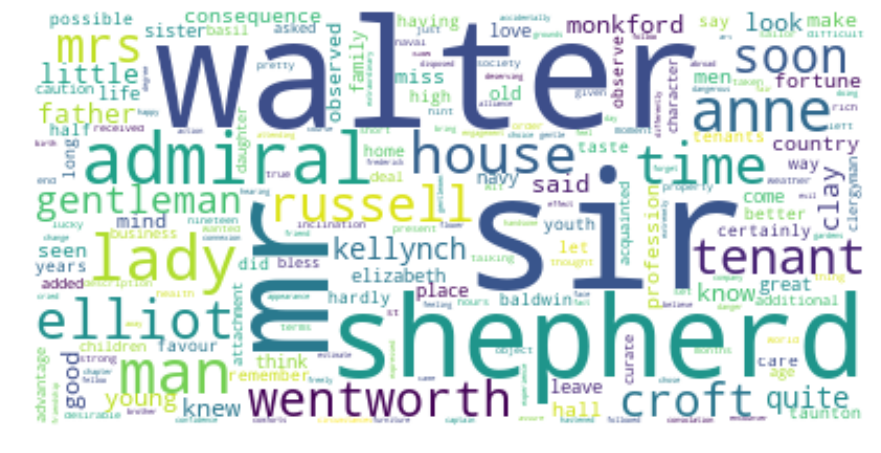

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,15))
_ = ax.imshow(wordcloud, interpolation='bilinear')
_ = ax.axis("off")
fig.savefig("../images/countvect_wordcloud.png", bbox_inches = 'tight', pad_inches = 0)